In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import GridSearchCV  
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import KFold
from math import sqrt                                       
import operator                                   
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
plt.rcParams['figure.figsize'] = (20,15)           
plt.rcParams['font.size'] = 15

train_data = pd.read_csv('training zindi impute pop.csv', encoding = 'utf-8')

test_data = pd.read_csv('testing zindi impute pop.csv', encoding = 'utf-8')

train_route = pd.read_csv('train_route.csv', encoding = 'utf-8')

test_route = pd.read_csv('test_route.csv', encoding = 'utf-8')

train_uber = pd.read_csv('train_uber.csv', encoding = 'utf-8')

test_uber = pd.read_csv('test_uber.csv', encoding = 'utf-8')

uber_features = pd.read_csv('uber_features.csv', encoding = 'utf-8')


del train_data['Unnamed: 0']

del test_data['Unnamed: 0']

del train_route['Unnamed: 0']

del test_route['Unnamed: 0']



In [ ]:
train_data.columns

In [ ]:
len(train_features)

In [ ]:
train_uber.columns

In [ ]:
uber_features.columns

In [2]:
train_uber.rename(columns= {
    "order_no": "Order No"
}, inplace=True)

In [3]:
test_data.rename(columns= {
    "Order_No": "Order No"
}, inplace=True)

In [4]:
train_data = train_data.merge(train_uber, how = 'left',\
                    on = ['Order No'])

test_data = test_data.merge(test_uber, how = 'left',\
                    on = ['Order No'])


In [ ]:
train_data.columns

# Is there a pattern to the Speed of Drivers? Let's convert time to seconds for modelling

In [ ]:
len(test_data)

In [ ]:
train_data.isnull().sum(axis = 0)

In [5]:
train_data[['mean_travel_timeweekly','mean_travel_timehourly', 'mean_travel_timemonthly', 'mean_travel_timehourly_weekend', 'mean_travel_timehourly_weekday', \
'geometric_mean_travel_timeweekly', 'geometric_mean_travel_timehourly', 'geometric_mean_travel_timemonthly', \
'geometric_mean_travel_timehourly_weekend', 'geometric_mean_travel_timehourly_weekday']] = train_data[['mean_travel_timeweekly','mean_travel_timehourly', 'mean_travel_timemonthly', 'mean_travel_timehourly_weekend', 'mean_travel_timehourly_weekday', \
'geometric_mean_travel_timeweekly', 'geometric_mean_travel_timehourly', 'geometric_mean_travel_timemonthly', \
'geometric_mean_travel_timehourly_weekend', 'geometric_mean_travel_timehourly_weekday']].apply(lambda x: x.fillna(x.median()))

In [6]:
test_data[['mean_travel_timeweekly','mean_travel_timehourly', 'mean_travel_timemonthly', 'mean_travel_timehourly_weekend', 'mean_travel_timehourly_weekday', \
'geometric_mean_travel_timeweekly', 'geometric_mean_travel_timehourly', 'geometric_mean_travel_timemonthly', \
'geometric_mean_travel_timehourly_weekend', 'geometric_mean_travel_timehourly_weekday']] = test_data[['mean_travel_timeweekly','mean_travel_timehourly', 'mean_travel_timemonthly', 'mean_travel_timehourly_weekend', 'mean_travel_timehourly_weekday', \
'geometric_mean_travel_timeweekly', 'geometric_mean_travel_timehourly', 'geometric_mean_travel_timemonthly', \
'geometric_mean_travel_timehourly_weekend', 'geometric_mean_travel_timehourly_weekday']].apply(lambda x: x.fillna(x.median()))

In [7]:
train_data = train_data.merge(train_route, how = 'left',\
                    on = ['Order No'])

test_data = test_data.merge(test_route, how = 'left',\
                    on = ['Order No'])


In [ ]:
r2_score(train_data['Time from Pickup to Arrival'], train_data['time(s)'])

In [8]:
train_data['time(s)'] = train_data['time(s)'].fillna(train_data['time(s)'].median())

test_data['time(s)'] = test_data['time(s)'].fillna(test_data['time(s)'].median())

In [ ]:
print(mean_squared_error(train_data['Distance (KM)'], train_data['distance dataset']))



print(sqrt(mean_squared_error(train_data['Time from Pickup to Arrival'], train_data['time(s)'])))

In [9]:
train_route['time(s)'] = train_route['time(s)'] 

test_route['time(s)'] = test_route['time(s)']

In [10]:
#Exploring the speed of th#train_data.groupby('Rider Id')['Time from Pickup to Arrival(hrs)']

# pd.melt(train_data, id_vars=['Rider Id'], value_vars='Speed(km/hr)',\
#         value_name = 'Speed(km/hr)')e datapoints

train_data['Speed(km/hr)'] = train_data['Distance (KM)'] / train_data['Time from Pickup to Arrival']

#train_data['est speed'] = train_data['Distance (KM)'] / train_data['time(s)']


In [ ]:
train_data['Speed(km/hr)'].hist()

# Analyse extremely slow & fast trips

In [ ]:
train_data_slow = train_data[train_data['Speed(km/hr)'] > 7000]

In [ ]:
train_data_slow.columns

In [ ]:
train_data_slow = train_data_slow[['Distance (KM)', 'Pickup - Day of Month', 'Pickup - Weekday (Mo = 1)', 'pick time overall hour','Time from Pickup to Arrival',
               'Speed(km/hr)']]

In [ ]:
train_data_slow['Time from Pickup to Arrival'] = train_data_slow['Time from Pickup to Arrival']  * 3600

In [ ]:
train_data_slow

In [ ]:
train_data = train_data[train_data['Speed(km/hr)'] <= 7000]

In [11]:
rider_time= train_data.groupby('Rider Id')['Time from Pickup to Arrival'].median()

# pd.melt(train_data, id_vars=['Rider Id'], value_vars='Speed(km/hr)',\
#         value_name = 'Speed(km/hr)')

In [12]:
rider_speed = train_data.groupby('Rider Id')['Speed(km/hr)'].median()

In [13]:
def med_speed(row):
    
    try:
    
        row['avg_speed_rider'] = rider_speed.loc[row['Rider Id']]
    
    except: 
        
        row['avg_speed_rider'] = rider_speed.median()
    
    return row


In [14]:
def med_time(row):
    
    try:
    
        row['avg_time_rider'] = rider_time.loc[row['Rider Id']]
    
    except: 
        
        row['avg_time_rider'] = rider_time.median()
    
    return row

In [15]:
train_data = train_data.apply(med_speed, axis = 1)

test_data = test_data.apply(med_speed, axis = 1)



train_data = train_data.apply(med_time, axis = 1)

test_data = test_data.apply(med_time, axis = 1)

In [ ]:
test_data['avg_time_rider']

In [16]:
#function for week of month

def augment_dist_brackets(df):
    
    if df in list(range(1, 4)):
        
        return 'dist 1-3'
    
    elif df in list(range(4, 8)):
        
        return 'dist 4-7'
    
    elif df in list(range(8, 13)):
        
        return 'dist 8-12'
    
    elif df in list(range(13, 17)):
        
        return 'dist 13-16'
    
    elif df in list(range(17, 22)):
        
        return 'dist 17-21'
    
    elif df in list(range(22, 26)):
        
        return 'dist 21-25'
    
    else:
        
        return 'dist > 25'

In [17]:
train_data['dist bracket'] = train_data['Distance (KM)'].apply(augment_dist_brackets)

test_data['dist bracket'] = test_data['Distance (KM)'].apply(augment_dist_brackets)



In [ ]:
train_data['dist bracket']

In [18]:
dist_time_train= train_data.groupby('dist bracket')['Time from Pickup to Arrival'].median()


In [19]:
def dist_time(row):
    
    try:
    
        row['avg_time_dist'] = dist_time_train.loc[row['dist bracket']]
    
    except: 
        
        row['avg_time_dist'] = dist_time_train.median()
    
    return row

In [20]:
train_data = train_data.apply(dist_time, axis = 1)

test_data = test_data.apply(dist_time, axis = 1)



In [ ]:
test_data.describe()

In [21]:
train_data.describe()

train_data = train_data.loc[train_data['arrival pickup_confirmation delta'] != 0]

In [22]:
train_data.describe()

train_data = train_data.loc[train_data['confirmation_placement_delta'] != 0]

In [23]:
#converting to objects

train_data['pick time overall hour'] = train_data['pick time overall hour'].astype(str)

test_data['pick time overall hour'] = test_data['pick time overall hour'].astype(str)

# train_data['Pickup - Day of Month'] = train_data['Pickup - Day of Month'].astype(str)

# test_data['Pickup - Day of Month'] = test_data['Pickup - Day of Month'].astype(str)

# train_data['Pickup - Weekday (Mo = 1)'] = train_data['Pickup - Weekday (Mo = 1)'].astype(str)

# test_data['Pickup - Weekday (Mo = 1)'] = test_data['Pickup - Weekday (Mo = 1)'].astype(str)

# train_data['Platform Type'] = train_data['Platform Type'].astype(str)

# test_data['Platform Type'] = test_data['Platform Type'].astype(str)



In [ ]:
train_data.columns

In [24]:
hour_speed = train_data.groupby('pick time overall hour')['Speed(km/hr)'].median()

In [25]:
hour_time = train_data.groupby('pick time overall hour')['Time from Pickup to Arrival'].median()

In [26]:
def hour_med_speed(row):
    
    try:
    
        row['avg_speed_hour'] = hour_speed.loc[row['pick time overall hour']]
    
    except: 
        
        row['avg_speed_hour'] = hour_speed.median()
    
    return row


In [27]:
def hour_med_time(row):
    
    try:
    
        row['avg_time_hour'] = hour_time.loc[row['pick time overall hour']]
    
    except: 
        
        row['avg_time_hour'] = hour_time.median()
    
    return row


In [28]:
train_data = train_data.apply(hour_med_speed, axis = 1)

test_data = test_data.apply(hour_med_speed, axis = 1)



train_data = train_data.apply(hour_med_time, axis = 1)

test_data = test_data.apply(hour_med_time, axis = 1)

In [29]:
day_speed = train_data.groupby('Pickup - Day of Month')['Speed(km/hr)'].median()

In [30]:
day_time = train_data.groupby('Pickup - Day of Month')['Time from Pickup to Arrival'].median()

In [31]:
def day_med_speed(row):
    
    try:
    
        row['avg_speed_day'] = day_speed.loc[row['Pickup - Day of Month']]
    
    except: 
        
        row['avg_speed_day'] = day_speed.median()
    
    return row


In [32]:
def day_med_time(row):
    
    try:
    
        row['avg_time_day'] = day_time.loc[row['Pickup - Day of Month']]
    
    except: 
        
        row['avg_time_day'] = day_time.median()
    
    return row


In [33]:
train_data = train_data.apply(day_med_speed, axis = 1)

test_data = test_data.apply(day_med_speed, axis = 1)



train_data = train_data.apply(day_med_time, axis = 1)

test_data = test_data.apply(day_med_time, axis = 1)

In [34]:
week_speed = train_data.groupby('Pickup - Weekday (Mo = 1)')['Speed(km/hr)'].median()

In [35]:
week_time = train_data.groupby('Pickup - Weekday (Mo = 1)')['Time from Pickup to Arrival'].median()

In [36]:
def week_med_speed(row):
    
    try:
    
        row['avg_speed_week'] = week_speed.loc[row['Pickup - Weekday (Mo = 1)']]
    
    except: 
        
        row['avg_speed_week'] = week_speed.median()
    
    return row

In [37]:
def week_med_time(row):
    
    try:
    
        row['avg_time_week'] = week_time.loc[row['Pickup - Weekday (Mo = 1)']]
    
    except: 
        
        row['avg_time_week'] = week_time.median()
    
    return row


In [38]:
train_data = train_data.apply(week_med_speed, axis = 1)

test_data = test_data.apply(week_med_speed, axis = 1)



train_data = train_data.apply(week_med_time, axis = 1)

test_data = test_data.apply(week_med_time, axis =1)

In [ ]:
train_data.columns

In [ ]:
train_data['distance dataset']

In [ ]:
#creating copy of train set for analysis and manipulation


#function to create full date that account for overall arrival and pickup date
def create_dates(x, y, z):
    
    return '2019' + '-' + '08' + '-' + str(int(x)) + '-' + '0' + str(int(y)) + ' ' + str(z)

In [ ]:
# applying function that created the combined dates and times from individual columns

train_data['pickup time overall'] = np.vectorize(create_dates)(train_data['Pickup - Day of Month'],\
                                                   train_data['Pickup - Weekday (Mo = 1)'],
                                                   train_data['Pickup - Time'])


In [ ]:
# applying function that created the combined dates and times from individual columns

test_data['pickup time overall'] = np.vectorize(create_dates)(test_data['Pickup - Day of Month'],\
                                                   test_data['Pickup - Weekday (Mo = 1)'],
                                                   test_data['Pickup - Time'])


In [ ]:
# #converting to date format for date arithmetic 

train_data['pickup time overall'] = pd.to_datetime(train_data['pickup time overall'])

test_data['pickup time overall'] = pd.to_datetime(test_data['pickup time overall'])



In [ ]:
train_data['minute']= train_data['pickup time overall'].dt.minute

test_data['minute']= test_data['pickup time overall'].dt.minute

In [39]:
train_data['ratings / order'] = train_data['No_of_Ratings']  / train_data['No_Of_Orders']

test_data['ratings / order'] = test_data['No_of_Ratings']  / test_data['No_Of_Orders']

In [ ]:
train_data.columns

In [ ]:
train_data[train_data['Average_Rating'] == 0]

In [40]:
train_uber_sub = pd.read_csv('uber_sub_train.csv', encoding = 'utf-8')

test_uber_sub = pd.read_csv('uber_sub_test.csv', encoding = 'utf-8')

In [41]:
train_uber_sub = train_uber_sub[['Order No', 'SubLocation Name', 'SubLocation Name.1']]

test_uber_sub = test_uber_sub[['Order No', 'SubLocation Name', 'SubLocation Name.1']]

In [42]:
train_data = train_data.merge(train_uber_sub, how = 'left',\
                    on = ['Order No'])

test_data = test_data.merge(test_uber_sub, how = 'left',\
                    on = ['Order No'])

In [ ]:
train_data[['Distance (KM)', 'SubLocation Name', 'SubLocation Name.1']]

In [43]:
train_locs_list = set(list(zip(train_data['SubLocation Name'], train_data['SubLocation Name.1'])))

In [44]:
test_locs_list = set(list(zip(test_data['SubLocation Name'], test_data['SubLocation Name.1'])))

In [ ]:
len(test_locs_list)

In [ ]:
len(set(train_locs_list).intersection(test_locs_list))

In [ ]:
locs_group_time = pd.DataFrame(train_data.groupby(('SubLocation Name', 'SubLocation Name.1'))['Time from Pickup to Arrival'].median())

In [ ]:
locs_group_speed = pd.DataFrame(train_data.groupby(('SubLocation Name', 'SubLocation Name.1'))['Speed(km/hr)'].median())

In [ ]:
locs_group_speed.columns

In [ ]:
pd.DataFrame(train_data.groupby(('SubLocation Name', 'SubLocation Name.1'))['Time from Pickup to Arrival'].value_counts()).max()

In [ ]:
locs_group_speed

In [ ]:
locs_group_speed = locs_group_speed.reset_index()

In [ ]:
train_data['avg_time_loc_group']

In [45]:
subloc_time = train_data.groupby('SubLocation Name')['Time from Pickup to Arrival'].median()

In [46]:
subloc_speed = train_data.groupby('SubLocation Name')['Speed(km/hr)'].median()

In [ ]:
subloc_time

In [ ]:
train_data.columns

In [47]:
def subloc_med_speed(row):
    
    try:
    
        row['avg_speed_subloc'] = subloc_speed.loc[row['SubLocation Name']]
    
    except: 
        
        row['avg_speed_subloc'] = subloc_speed.median()
    
    return row

In [48]:
def subloc_med_time(row):
    
    try:
    
        row['avg_time_subloc'] = subloc_time.loc[row['SubLocation Name.1']]
    
    except: 
        
        row['avg_time_subloc'] = subloc_time.median()
    
    return row

In [49]:
train_data = train_data.apply(subloc_med_speed, axis = 1)

test_data = test_data.apply(subloc_med_speed, axis = 1)



train_data = train_data.apply(subloc_med_time, axis = 1)

test_data = test_data.apply(subloc_med_time, axis =1)

In [50]:
subloc1_time = train_data.groupby('SubLocation Name.1')['Time from Pickup to Arrival'].median()

In [51]:
subloc1_speed = train_data.groupby('SubLocation Name.1')['Speed(km/hr)'].median()

In [52]:
def subloc1_med_speed(row):
    
    try:
    
        row['avg_speed_subloc1'] = subloc1_speed.loc[row['SubLocation Name.1']]
    
    except: 
        
        row['avg_speed_subloc1'] = subloc1_speed.median()
    
    return row

In [53]:
def subloc1_med_time(row):
    
    try:
    
        row['avg_time_subloc1'] = subloc_time.loc[row['SubLocation Name.1']]
    
    except: 
        
        row['avg_time_subloc1'] = subloc_time.median()
    
    return row

In [54]:
train_data = train_data.apply(subloc1_med_speed, axis = 1)

test_data = test_data.apply(subloc1_med_speed, axis = 1)



train_data = train_data.apply(subloc1_med_time, axis = 1)

test_data = test_data.apply(subloc1_med_time, axis =1)

In [ ]:
train_data.columns

In [ ]:
train_data['Average_Rating'].unique()

In [ ]:
train_data.columns

In [ ]:
train_features.columns

In [55]:
rider_record = (set(train_data['Rider Id']))

In [ ]:
rider_record

In [56]:
rider_number = list(range(0, 924))

In [57]:
rider_dict = dict(zip(rider_record, rider_number))

In [58]:
rider_dict['unk'] = len(rider_dict) + 1

In [59]:
rider_dict.get(train_data['Rider Id'].iloc[0], rider_dict['unk'])

507

In [60]:
train_data['Rider Id'] = train_data['Rider Id'].apply(lambda x : rider_dict.get(x, rider_dict['unk']))

In [61]:
test_data['Rider Id'] = test_data['Rider Id'].apply(lambda x : rider_dict.get(x, rider_dict['unk']))

In [ ]:
rider_dict

In [62]:
subloc_number = list(range(0, len(set(train_data['SubLocation Name']))))

In [ ]:
len(subloc_number)

In [63]:
subloc_record = (set(train_data['SubLocation Name']))

In [64]:
subloc_dict = dict(zip(subloc_record, subloc_number))

In [65]:
subloc_dict['unk'] = len(subloc_dict) + 1

In [66]:
train_data['SubLocation Name'] = train_data['SubLocation Name'].apply(lambda x : subloc_dict.get(x, subloc_dict['unk']))

In [67]:
test_data['SubLocation Name'] = test_data['SubLocation Name'].apply(lambda x : subloc_dict.get(x, subloc_dict['unk']))

In [68]:
subloc_number_2 = list(range(0, len(set(train_data['SubLocation Name.1']))))

In [69]:
subloc_record_2 = (set(train_data['SubLocation Name.1']))

In [70]:
subloc_dict_2 = dict(zip(subloc_record_2, subloc_number_2))

In [71]:
subloc_dict_2['unk'] = len(subloc_dict_2) + 1

In [72]:
train_data['SubLocation Name.1'] = train_data['SubLocation Name.1'].apply(lambda x : subloc_dict_2.get(x, subloc_dict_2['unk']))

In [73]:
test_data['SubLocation Name.1'] = test_data['SubLocation Name.1'].apply(lambda x : subloc_dict_2.get(x, subloc_dict_2['unk']))

In [ ]:
train_data.columns

In [ ]:
train_data[['mean_travel_timeweekly_s', 'mean_travel_timehourly_s',
       'mean_travel_timemonthly_s', 'mean_travel_timehourly_weekend_s',
       'mean_travel_timehourly_weekday_s', 'time(s)_s']] = train_data[['mean_travel_timeweekly', 'mean_travel_timehourly',
       'mean_travel_timemonthly', 'mean_travel_timehourly_weekend',
       'mean_travel_timehourly_weekday', 'time(s)']].apply(calc_speed)

In [ ]:
test_data[['mean_travel_timeweekly_s', 'mean_travel_timehourly_s',
       'mean_travel_timemonthly_s', 'mean_travel_timehourly_weekend_s',
       'mean_travel_timehourly_weekday_s', 'time(s)_s']] = test_data[['mean_travel_timeweekly', 'mean_travel_timehourly',
       'mean_travel_timemonthly', 'mean_travel_timehourly_weekend',
       'mean_travel_timehourly_weekday', 'time(s)']].apply(calc_speed)

In [ ]:
train_data.columns

In [75]:
scatter =[]

for column in train_data.columns:
    
    if train_data[column].dtype != 'object':
        
        scatter.append(column)

In [76]:
#Correlation with target variable

features_correlation = train_data[scatter].apply(lambda x : x.corr(train_data['Time from Pickup to Arrival']))

features_correlation_abs = features_correlation.apply(lambda x : abs(x))
           
    
feature_correlation_sorted = sorted(features_correlation_abs.items(), key = operator.itemgetter(1), reverse = True)


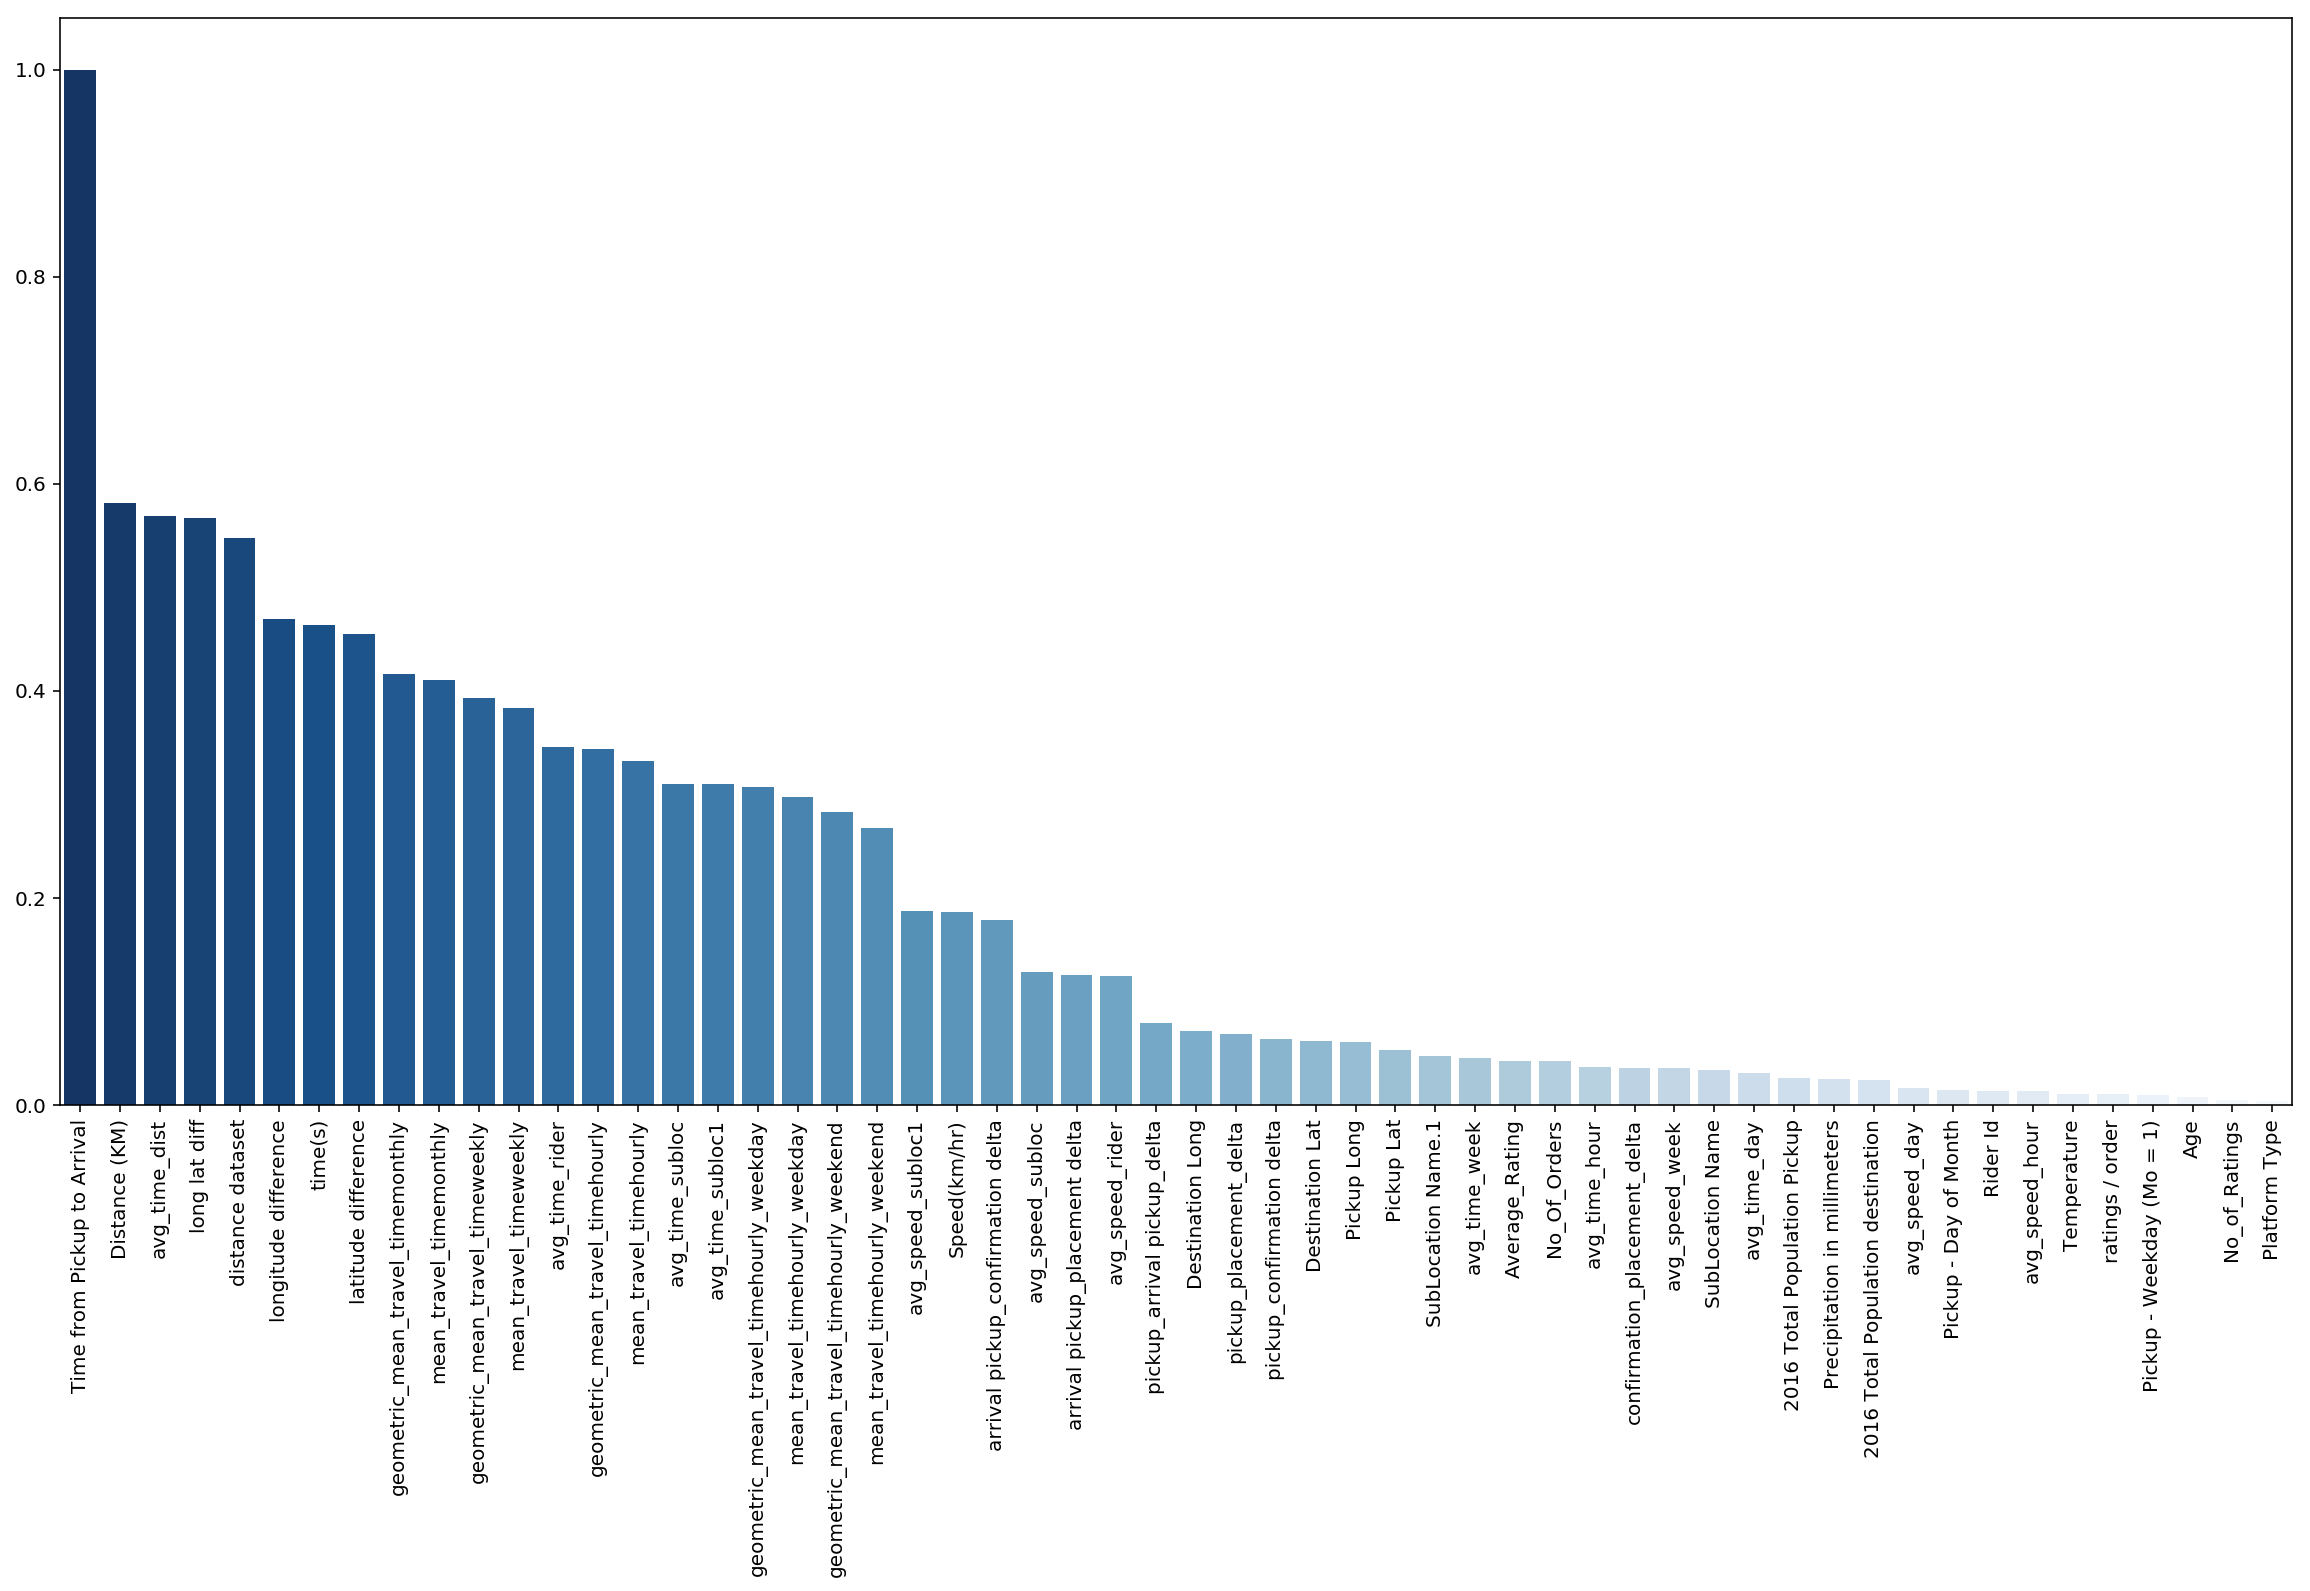

In [77]:
#BARPLOT SHOWING FEATURE CORRELATION SCORES

features_corr = dict(feature_correlation_sorted)

plt.figure(figsize = (20, 10))
sb.barplot(x = list(features_corr.keys()), y = list(features_corr.values()), palette = "Blues_r")
plt.xticks (rotation = 90)
plt.show()

In [ ]:
train_features.columns

In [ ]:
train_data.columns

In [ ]:
train_features.columns

In [ ]:
rider_dict

In [ ]:
train_data['Average_Rating'].unique()




In [ ]:
train_data['Average_Rating'].value_counts()

In [ ]:
train_data.groupby('Average_Rating')['Speed(km/hr)'].median()

In [ ]:
train_features.columns

In [ ]:
train_data = train_data.loc[train_data['Time from Pickup to Arrival'] <= 1.2] 

In [ ]:
#Test not using all Time values

train_data.loc[train_data['Time from Pickup to Arrival'] > 1.2][['Distance (KM)', 'Time from Pickup to Arrival']]

In [217]:
train_data['overall b4 delivery'] = train_data['confirmation_placement_delta'] + train_data['arrival pickup_confirmation delta'] + train_data['pickup_arrival pickup_delta']

In [218]:
test_data['overall b4 delivery'] = test_data['confirmation_placement_delta'] + test_data['arrival pickup_confirmation delta'] + test_data['pickup_arrival pickup_delta']

In [219]:
train_data_ref = train_data.copy()

In [250]:
train_data = train_data_ref.copy()

In [230]:
train_data = train_data[train_data['overall b4 delivery'] <= 3]

In [458]:

train_features = train_data.drop(['Order No',
                   'User Id', 'Platform Type', 'Pickup - Weekday (Mo = 1)', 'pick time overall hour',
                                  'long lat diff', \
                                 'Speed(km/hr)',\
                                 'dist bracket', \
                                'Arrival at Pickup - Time', 'Confirmation - Time', \
                                'Personal or Business',   \
                                 'Pickup - Day of Month', 'Pickup - Time',
                                 'Pickup - Time',\
                                'Placement - Time',  'geometric_mean_travel_timeweekly',
       'geometric_mean_travel_timehourly', 'geometric_mean_travel_timemonthly',
       'geometric_mean_travel_timehourly_weekend',
       'geometric_mean_travel_timehourly_weekday',
                                 
       
                                 'distance dataset',
                                 
                                 
                                  'pickup_placement_delta',
                                 'arrival pickup_placement delta',  \
                                
                                  \
                                
                               
                                  \
                              
       'SubLocation Name.1', \
                                 'SubLocation Name',
    
      
                               'avg_time_hour', 'avg_speed_hour', 'avg_time_day', 'avg_speed_day', 'avg_time_week',  \
                                'overall b4 delivery', 'avg_time_dist', \
                                 ], axis = 1)

In [456]:
test_data_model = test_data.drop(['Order_No',
                 'User Id', 'Platform Type',
                                  'long lat diff', 'Pickup - Weekday (Mo = 1)', 'pick time overall hour',
                                 
                                 'dist bracket', \
                                'Arrival at Pickup - Time', 'Confirmation - Time', \
                                'Personal or Business', \
                                 'Pickup - Day of Month', 'Pickup - Time', 
                                  \
                                 'Pickup - Time',\
                                'Placement - Time',\
                                
                                 'geometric_mean_travel_timemonthly',
       'geometric_mean_travel_timehourly_weekend',
       'geometric_mean_travel_timehourly_weekday',
                                 'distance dataset',
                                 'geometric_mean_travel_timeweekly',
                                 'pickup_placement_delta',  
                                 'arrival pickup_placement delta',  \
                                \
                                 
                                 \
                               'geometric_mean_travel_timehourly', 
                            
                                   
                             
      'avg_time_hour', 'avg_speed_hour', 
                                 'SubLocation Name.1','SubLocation Name','avg_time_day', \
                                 'avg_speed_day', 'avg_time_week','overall b4 delivery', 'avg_time_dist', \
                               ],  axis = 1)

In [477]:
train_features.columns

Index(['Destination Lat', 'Destination Long', 'Distance (KM)', 'Pickup Lat',
       'Pickup Long', 'Precipitation in millimeters', 'Rider Id',
       'Temperature', 'No_Of_Orders', 'Age', 'Average_Rating', 'No_of_Ratings',
       '2016 Total Population Pickup', '2016 Total Population destination',
       'pickup_arrival pickup_delta', 'pickup_confirmation delta',
       'confirmation_placement_delta', 'arrival pickup_confirmation delta',
       'latitude difference', 'longitude difference', 'mean_travel_timeweekly',
       'mean_travel_timehourly', 'mean_travel_timemonthly',
       'mean_travel_timehourly_weekend', 'mean_travel_timehourly_weekday',
       'time(s)', 'avg_speed_rider', 'avg_time_rider', 'avg_speed_week',
       'ratings / order', 'avg_speed_subloc', 'avg_time_subloc',
       'avg_speed_subloc1', 'avg_time_subloc1'],
      dtype='object')

In [149]:
train_features['Time from Pickup to Arrival'].quantile(0.99)

1.2911111111111109

In [ ]:
set(train_features.columns)-set(test_data_model.columns)

In [ ]:
#Extracting numeric columns for scatter plots

#dict for holding numeric columns

scatter =[]

for column in train_features.columns:
    
    if train_features[column].dtype != 'object':
        
        scatter.append(column)
        

In [ ]:
train_features[scatter].hist(bins = 25, figsize = (20, 15));

# Additional EDA

In [ ]:
#converting categorical to numeric encodings
def convert_object(df, df_test):
    
    for category in df.columns:
        
        le = LabelEncoder()
    
        if df[category].dtype == 'object':
        
            df[category] = le.fit_transform(df[category])
            
            df_test[category] = le.transform(df_test[category])
            
    return df, df_test

In [ ]:
train_features, test_data_model = convert_object(train_features, test_data_model)

In [ ]:
len(train_features)

In [ ]:
train_data['Speed(km/hr)'].hist()

In [ ]:
train_data['Speed(km/hr)'].quantile(0.99)

In [ ]:
#visualizing confirmation_placement

#train_features['confirmation_placement_delta'].hist(bins = 10, figsize = (15, 15));

#np.arange(0, train_features['confirmation_placement_delta'].max())
#plt.hist(data = poke, x = 'Speed', bins = bins)


Q1 = train_features['confirmation_placement_delta'].quantile(0.25)

# TODO: Calculate the third quartile of the population values
Q3 = train_features['confirmation_placement_delta'].quantile(0.75)

# TODP: Calculate the interquartile range Q3 - Q1
IQR = Q3 - Q1

# TODO: Calculate the maximum value and minimum values according to the Tukey rule
# max_value is Q3 + 1.5 * IQR while min_value is Q1 - 1.5 * IQR
max_value = Q3 + 3 * IQR
min_value = Q1 - 3 * IQR

In [459]:
# TODO: filter the population_2016 data for population values that are greater than max_value or less than min_value
train_features = train_features[(train_features['Distance (KM)'] < 30)]

train_targets = train_features['Time from Pickup to Arrival']

In [179]:
test_data_model['No_of_Ratings'].quantile(0.99)

2026.33

In [460]:
train_features = train_features.drop(['Time from Pickup to Arrival'], axis = 1)

In [ ]:
# train_features = convert_object(train_features)

# test_data_model = convert_object(test_data_model)

In [ ]:
test_data_model['loc bracket']

# Lightgbm Approach

In [81]:
import lightgbm as lgb

In [ ]:
import xgboost as xgb

In [ ]:
# print('Training and making predictions')
# params = {
#     'max_depth':[2, 4, 6, 8, 10, 50, 100, 200],
#     'learning_rate':[0.05, 0.1],
#     'min_data_in_leaf':[20, 40, 60, 80],
#     'num_leaves':[10, 50, 80, 150],
#     'n_estimators':[100, 200, 600, 1000],
#     #'min_sum_hessian_in_leaf':[1e-2, 1e-3, 1, 2, 4],
#     'bagging_fraction':[0.1, 0.2, 0.4],
#     'bagging_freq':[2, 4],
#     #'lambda_l2':[0, 10, 20, 30, 40, 50, 60],
#     #'min_gain_to_split':[1, 2],
#     'top_k':[20, 100],
#     'max_bin':[300, 400, 500, 600]}

# #n_iters = 100                                                             
                                                              
# #create Grid search object

# lboost = lgb.LGBMRegressor(objective='regression', metric='l2')

# lboost_cv = GridSearchCV(estimator = lboost, param_grid = params, cv = 5)


# #d_train = lgb.Dataset(x_train, label=y_train)
    
# lb_model = lboost_cv.fit(x_train, y_train)
    


# print(lb_model.best_estimator_)
# print('R2 training: ', lb_model.score(x_train, y_train))
# print('R2 test: ', lb_model.score(x_test, y_test))

    

In [ ]:
# MAX_ROUNDS = 1000
# OPTIMIZE_ROUNDS = True
# LEARNING_RATE = 0.04
# EARLY_STOPPING_ROUNDS = 100  
# # Note: I set EARLY_STOPPING_ROUNDS high so that (when OPTIMIZE_ROUNDS is set)
# #       I will get lots of information to make my own judgment.  You should probably
# #       reduce EARLY_STOPPING_ROUNDS if you want to do actual early stopping.

In [ ]:
# # Set up folds
# K = 5
# kf = KFold(n_splits = K, random_state = 1, shuffle = True)
# np.random.seed(0)

In [ ]:
# # #XGBOOST


# model = xgb.XGBRegressor(    
#                         n_estimators=MAX_ROUNDS,
#                         max_depth=4,
#                         objective="reg:squarederror",
#                         learning_rate=LEARNING_RATE, 
#                         subsample=.8,
#                         min_child_weight=6,
#                         colsample_bytree= 1,
#                         scale_pos_weight=1.6,
#                         gamma=1
#                         #reg_alpha=8,
#                         #reg_lambda=1.3,
#                      )

# # Run CV

# for i, (train_index, test_index) in enumerate(kf.split(train_features)):
    
#     # Create data for this fold
#     y_train, y_valid = train_targets.iloc[train_index].copy(), train_targets.iloc[test_index]
    
#     X_train, X_valid = train_features.iloc[train_index,:].copy(), train_features.iloc[test_index,:].copy()
    
#     print( "\nFold ", i)
    
#     # Run model for this fold
#     if OPTIMIZE_ROUNDS:
        
#         eval_set=[(X_valid,y_valid)]
        
#         fit_model = model.fit( X_train, y_train, 
                              
#                                eval_set=eval_set,
                              
#                                eval_metric= "rmse",
                              
#                                early_stopping_rounds=EARLY_STOPPING_ROUNDS,
                              
#                                verbose=False
#                              )
#         print( "  Best N trees = ", model.best_ntree_limit)
        
#         print( "  Best gini = ", model.best_score )
        
#     else:
        
#         fit_model = model.fit( X_train, y_train )




In [ ]:
# y_pred = fit_model.predict(train_features)

# sqrt(mean_squared_error(y_pred * 3600, train_targets * 3600))

In [ ]:
# # Run model for this fold
#     if OPTIMIZE_ROUNDS:
        
#         eval_set=[(X_valid,y_valid)]
        
#         fit_model = model.fit( X_train, y_train, 
                              
#                                eval_set=eval_set,
                              
#                                eval_metric=rmsle,
                              
#                                early_stopping_rounds=EARLY_STOPPING_ROUNDS,
                              
#                                verbose=False
#                              )
#         print( "  Best N trees = ", model.best_ntree_limit )
        
#         print( "  Best gini = ", model.best_score )
        
#     else:
        
#         fit_model = model.fit( X_train, y_train )












# # d_train = xgb.DMatrix(x_train, label = y_train)


# # d_valid = xgb.DMatrix(x_val, label= y_val)

# # watchlist = [d_valid]

# # xg_reg.fit(x_train, y_train)


# # preds = xg_reg.predict(x_val)

# print(sqrt(mean_squared_error(preds * 3600, y_val* 3600)))

In [ ]:

# params = {"learning-rate" : [0.02, 0.04, 0.06, 0.08, 0.10],
#          "max_depth" : [3, 5, 6, 10],
#          "colsample_bytree" : [0.3, 0.4, 0.5, 0.7, 0.8],
#          "n_estimators" : [50, 100, 150, 200, 400, 600],
#          "gamma" : [0.1, 0.2]}
          
          
          
# model = xgb.XGBRegressor(objective="reg:squarederror")
          
# kfold = KFold(n_splits = 5, shuffle = True, random_state = 7)
          
          
# grid_search = GridSearchCV(model, params, cv = kfold)
          
# grid_result = grid_search.fit(train_features, train_targets)


# d_train = xgb.Matrix(x_train, label = y_train)


# d_valid = xgb.DMatrix(x_val, label= y_val)

# watchlist = [d_valid]

# xg_reg.fit(x_train, y_train)


# preds = xg_reg.predict(x_val)

# print(sqrt(mean_squared_error(preds * 3600, y_val* 3600)))

In [82]:
#Validation function
n_folds = 10

def rmsle_cv(model):
    kf = KFold(n_folds, shuffle=True, random_state=100)
    rmse= np.sqrt(-cross_val_score(model, train_features, train_targets, scoring='neg_mean_squared_error', cv = kf))
    return(rmse)

In [461]:
#lIGHTGBM

model_lgb = lgb.LGBMRegressor(objective='regression',num_leaves=20,
                              learning_rate=0.03, n_estimators= 500,
                              bagging_fraction= 0.5, feature_fraction = 0.5,
                              max_depth = 20, min_child_samples = 100, \
                             )

In [ ]:
model_xgb = xgb.XGBRegressor(objective='reg:squarederror', num_leaves=20,
                              learning_rate=0.06, n_estimators= 200,
                              subsample = 0.5, colsample_bytree = 0.5,
                              max_depth = 20, min_child_samples = 100, \
                             )

In [227]:
len(train_features)

22

In [462]:
score = rmsle_cv(model_lgb)
print("LGBM score:{:.4f} ({:.4f})\n" .format(score
             
                                             
           
        
                   
                                             .mean() * 3600, score.std()))



LGBM score:704.5505 (0.0079)



In [ ]:
score = rmsle_cv(model_xgb)
print("LGBM score:{:.4f} ({:.4f})\n" .format(score
             
                                             
           
        
                   
                                             .mean() * 3600, score.std()))



In [463]:
# from sklearn.metrics import SCORERS
# SCORERS.keys()

model_lgb.fit(train_features, train_targets)


preds = model_lgb.predict(train_features)

In [ ]:
lgb_params = {'boosting_type' : 'gbdt', 'objective' : 'regression', 'num_leaves' : 20, 'max_depth' : 20,\
             'learning_rate' : 0.06, 'feature_fraction': 0.3, 'bagging_fraction':0.3, 'split' : 'gain', \
             'min_child_samples' : 100}

n_estimators = 600

d_train = lgb.Dataset(train_features, label = train_targets)

cv_results_lgb = lgb.cv(lgb_params, d_train, num_boost_round = 600, nfold = 5, metrics = "rmse", stratified = False)


cv_results_lgb['rmse-mean'][-1] * 3600

In [ ]:
#lightgbm model 1


lgb_params = {'boosting_type' : 'gbdt', 'objective' : 'regression', 'num_leaves' : 20, 'max_depth' : 20,\
             'learning_rate' : 0.06, 'feature_fraction': 0.3, 'bagging_fraction':0.3, 'split' : 'gain', \
             'min_child_samples' : 100}

n_estimators = 700

d_train = lgb.Dataset(train_features, label = train_targets)

# d_valid = lgb.Dataset(x_val, label= y_val)

# watchlist = [d_valid]

model = lgb.train(lgb_params, d_train, n_estimators, verbose_eval=0 )


# preds = model.predict(x_val)

# print(sqrt(mean_squared_error(preds * 3600,  y_val* 3600)))

In [ ]:
train_features.columns

In [464]:
print(sqrt(mean_squared_error(model_lgb.predict(train_features) * 3600, train_targets * 3600)))

637.7487224833314


In [ ]:
from sklearn.externals import joblib

joblib.dump(model, 'lgb_best_model_best 709.pkl')

gbm_pickle = joblib.load('lgb_best_model_best 709.pkl')

In [ ]:
gbm_pickle.params

In [ ]:
lgbm1_predict= gbm_pickle.predict(train_features)

In [ ]:
# print(sqrt(mean_squared_error(lgbm1_predict * 3600, train_targets * 3600)))

# Predictions on test data

In [ ]:
train_features.columns

In [ ]:
test_data_model.isnull().sum(axis = 0)

In [249]:
len(train_features)

21057

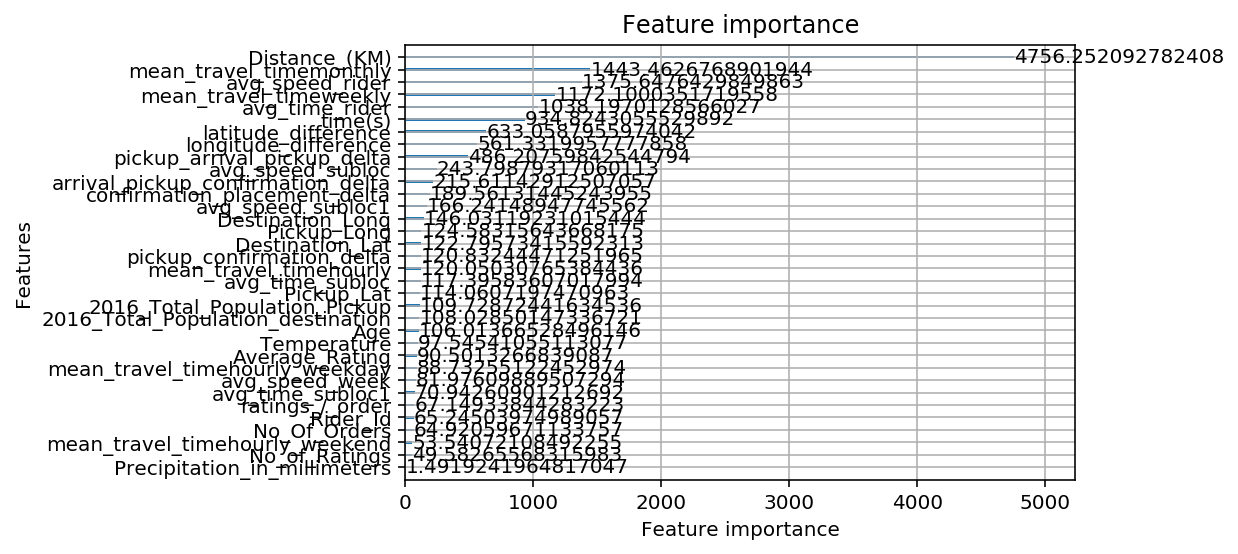

In [465]:
lgb.plot_importance(model_lgb, importance_type = "gain")

In [466]:
test_data_model= test_data_model.drop(['Time from Pickup to Arrival predictions'], axis = 1)

In [ ]:
train_features.columns

In [ ]:
test_data_model.columns

In [467]:
test_data['Time from Pickup to Arrival predictions'] = model_lgb.predict(test_data_model)

In [ ]:
set(test_data_model.columns) - set(train_features.columns)

In [468]:
test_data['Time from Pickup to Arrival predictions'] = abs(test_data['Time from Pickup to Arrival predictions'] * 3600)

In [469]:
submission = pd.read_csv('SampleSubmission.csv', encoding = 'utf-8')


In [97]:
test_data['Order_No'] = test_data['Order No']

test_data = test_data.drop(['Order No'], axis =1)

In [470]:
test_results = submission.merge(test_data, how = 'inner', on = ['Order_No'])



In [471]:
test_results = test_results[['Order_No', 'Time from Pickup to Arrival predictions']]

In [472]:
test_results = test_results.rename(columns = {"Time from Pickup to Arrival predictions" : "Time from Pickup to Arrival"})

In [473]:
test_results["Time from Pickup to Arrival"] = test_results["Time from Pickup to Arrival"].astype(int)

In [ ]:
#test_results = test_results["Time from Pickup to Arrival"]

In [414]:
test_results.to_csv('last model 1.csv', index = False)

In [476]:
test_results

,Order_No,Time from Pickup to Arrival
0,Order_No_19248,1664
1,Order_No_12736,1690
2,Order_No_768,1665
3,Order_No_15332,1007
4,Order_No_21373,1062
5,Order_No_14573,2254
6,Order_No_6731,1994
7,Order_No_18436,1570
8,Order_No_2288,1462
9,Order_No_9063,2490


In [475]:
test_results[test_results['Time from Pickup to Arrival'] <= 10]

,Order_No,Time from Pickup to Arrival
2477,Order_No_6143,10
2480,Order_No_1734,6
2584,Order_No_1824,4


In [ ]:
#analyzing negative time prediction

# Linear Regression  & Neural Net Approach